<meta property='og:image' content='https://www.information-age.com/wp-content/uploads/2018/11/data-era-1013x440.jpeg'>

![](https://www.information-age.com/wp-content/uploads/2018/11/data-era-1013x440.jpeg)

<h1><center> Crime & Economy (in python) </center></h1>

In this project I look for a relationship between economic data and crime rates. 

I obtained statistics for various industries at the county level from the Bureau of Labor Statistics. I also found the number of arrests and charges for a variety of crimes at the county level from the Inter-University Consortium for Political and Social Research. These datasets span from 2009, 2010, 2012, 2014, and 2016.

After cleaning the data I will test out some statistical analysis.

\---------------------------------------------------------------------------

BLS, link to data: https://www.bls.gov/cew/datatoc.htm

ICPSR / Crime, link to data: https://www.icpsr.umich.edu/icpsrweb/NACJD/series/57 (seires name: "Uniform Crime Reporting Program Data: County-Level Detailed Arrest and Offense Data, United States, yyyy")

In [15]:
# Project
%run Imports.ipynb
# Imports functions from seperate notebook
%run Functions.ipynb

Notebooky Directory:  C:\Users\Matt\Downloads\Project


Here I load in the data and spit out some summary statistics on the structure of the data.

In [3]:
# Reading in Data
start_time = timeit.default_timer()
# Keys to extract formatted State and County names
key = pd.read_excel('fips_codes_website.xls')   # Counties and major cities
key00 = pd.read_csv('FIPS_countycodes.txt',delimiter=',')  # Counties only
key00['GU Name'] = key00['GU Name'].str[:-7]  # Slice 'county' from names
# Crime
crime2009 = pd.read_csv('30763-0001-crimedata2009.txt',delimiter='\t')
crime2010 = pd.read_csv('33523-0001-crimedata2010.txt',delimiter='\t')
crime2012 = pd.read_csv('35019-0001-crimedata2012.txt',delimiter='\t')
crime2014 = pd.read_csv('36399-0001-crimedata2014.txt',delimiter='\t')
crime2016 = pd.read_csv('37059-0001-crimedata2016.txt',delimiter='\t')

# Enumployment & Wages
#test_wages_18 = pd.read_excel('allhlcn183.xlsx',sheet_name='US_St_Cn_MSA')
wage_unemp2018 = pd.read_csv('allhlcn183wage_unemp2018.txt',delimiter='\t',dtype={'St':str})
wage_unemp2016 = pd.read_csv('allhlcn163wage_unemp2016.txt',delimiter='\t',dtype={'St':str})
wage_unemp2014 = pd.read_csv('allhlcn143wage_unemp2014.txt',delimiter='\t',dtype={'St':str})
wage_unemp2012 = pd.read_csv('allhlcn123wage_unemp2012.txt',delimiter='\t',dtype={'St':str})
wage_unemp2010 = pd.read_csv('allhlcn103wage_unemp2010.txt',delimiter='\t',dtype={'St':str})
wage_unemp2009 = pd.read_csv('allhlcn093wage_unemp2009.txt',delimiter='\t',dtype={'St':str})

print("2014 crime:",crime2014.shape,"// key:",key.shape)
print('2018 Wages:',wage_unemp2018.shape)
x = ((crime2014.shape[0])*(crime2014.shape[1]))*4 + ((wage_unemp2018.shape[0])*(wage_unemp2018.shape[1]))*5 + (key00.shape[0])*key00.shape[1]
print(x,'unique datapoints in all datasets')
elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')

2014 crime: (3177, 56) // key: (41787, 7)
2018 Wages: (62724, 21)
7313843 unique datapoints in all datasets
3.626 run time


In [16]:
# Data Cleaning #
pd.options.mode.chained_assignment = None # Turn off copy with setting warning
start_time = timeit.default_timer()
# Yearly cleaned databases
# Cleaned Crime Data
crime09, crime10, crime12, crime14, crime16 = crime_cleaner(crime2009),crime_cleaner(crime2010),crime_cleaner(crime2012),crime_cleaner(crime2014),crime_cleaner(crime2016)
cols = list(crime14.columns.values) # Grab columns
# Cleaned Wage Data
economic09,economic10,economic12,economic14,economic16,economic18 = wage_cleaner(wage_unemp2009),wage_cleaner(wage_unemp2010),wage_cleaner(wage_unemp2012),wage_cleaner(wage_unemp2014),wage_cleaner(wage_unemp2016),wage_cleaner(wage_unemp2018)

economic18['Industry'] = economic18['Industry'].str[1:] # Remove first space in 2018 industry codes
# Convert all values to floats
z = economic10.columns.tolist() # List of column names to manipulate
y = z[-8:]
economic09,economic10,economic12,economic14,economic16,economic18 = bot97(economic09),bot97(economic10),bot97(economic12),bot97(economic14),bot97(economic16),bot97(economic18)

# Combined crime and economic dataframes and rearrange columns
db2010 = crime10.merge(economic10,left_on=['State Abbreviation','GU Name'],right_on=['State Abbreviation','GU Name'])
cols = db2010.columns.tolist()  # Code to rearrange columns
cols = ['Year']+cols[:-14]+cols[-10:]
db2010 = db2010[cols]
db2009,db2012,db2014,db2016 = bot96(economic09,crime09,cols),bot96(economic12,crime12,cols),bot96(economic14,crime14,cols),bot96(economic16,crime16,cols)
elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')

3.77 run time


Here I generate a sample dataset of randomly selected counties and all associated data. 

It is worth noting that this can be computationally expensive and that cell run times take about 0.1 seconds per county in the sample. 

(e.g. a sample of 400 counties will take ~40 seconds to generate in the cell below)

In [17]:
# Selects X Random counties and stores them as a dictionary by count // Key = MI, County
start_time = timeit.default_timer()
samp_db = {}
for n in range(100):
    r = random.randint(0,len(crime12))
    x = crime12['State Abbreviation'].iloc[r] # Pull State Abreviation
    y = crime12['GU Name'].iloc[r]  # Pull analogous county name
    z = x+', '+y # Format name for dictionary key
    agg = test_search(y,x) # Return criminal and economic data
    samp_db[z] = agg  # Add data to empty dictionary
keys = list(samp_db.keys())
print(len(samp_db))
print(samp_db.keys())
elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')

98
dict_keys(['TX, Polk', 'SD, Edmunds', 'IL, Shelby', 'CO, Mesa', 'WI, Marinette', 'IN, Newton', 'GA, Hall', 'AL, Choctaw', 'MD, Howard', 'SD, Lincoln', 'OH, Knox', 'VA, Powhatan', 'WV, Calhoun', 'WA, Spokane', 'MN, Clearwater', 'VA, Orange', 'WI, Kewaunee', 'OK, Pushmataha', 'NC, Stanly', 'VT, Windsor', 'GA, Murray', 'MO, Howard', 'NH, Sullivan', 'NC, Clay', 'GA, Bartow', 'NC, Camden', 'NE, Howard', 'NM, Cibola', 'WY, Natrona', 'SC, Pickens', 'WV, Boone', 'KY, McCracken', 'MN, Clay', 'VA, James City', 'NY, Bronx', 'SC, Richland', 'ME, Waldo', 'ME, Kennebec', 'NH, Cheshire', 'KY, Nicholas', 'AK, Anchorage Munic', 'FL, Lake', 'TX, Pecos', 'MO, Adair', 'MI, Mackinac', 'VA, Fauquier', 'LA, St. Mary', 'GA, Dade', 'WI, Rusk', 'MO, Crawford', 'OK, Delaware', 'SC, Greenville', 'OH, Highland', 'OR, Wasco', 'IL, White', 'AL, Lee', 'MO, Callaway', 'OH, Morrow', 'VA, Colonial Heigh', 'TX, Ellis', 'KY, Logan', 'WV, Clay', 'IN, Pike', 'KS, Meade', 'IA, Keokuk', 'AK, Juneau City and ', 'WI, Oconto'

In [18]:
# Select 5 biggest industries in sample
industry = big_industry_bot(samp_db)
print('5 Largest Industries in sample:\n',industry)

5 Largest Industries in sample:
 ['Goods-producing', 'Construction', 'Manufacturing', 'Service-providing', 'Trade, transportation, and utilities']
0.018 run time


In [19]:
# start base data frame -- create new dataframe, still need to account for various industries
bedrock = samp_db # Initialize sample to new variable for trouble shooting // preserve OG sample data

new_world = pd.DataFrame()

for a in keys:
    for b in industry[:]:
        x = bedrock[a].loc[bedrock[a]['Industry'] == b] #
        new_world = new_world.append(x)
        
new_world = new_world.reset_index()  # reset index
new_world = new_world.drop('index',axis=1)  # drop index column
cols = new_world.columns.tolist() # rearrange columns
cols = cols[:3]+cols[-9:]+cols[3:48]
new_world = new_world[cols]

elapsed = timeit.default_timer() - start_time
print(round(elapsed,3),'run time')
new_world.head(10)

2.35 run time


,Year,State Abbreviation,GU Name,Industry,Establishment Count,July Employment,August Employment,September Employment,Total Quarterly Wages,Average Weekly Wage,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
0,2009,TX,Polk,Goods-producing,124,1797.0,1799.0,1822,19058608.0,812,...,8,152,19,219,145,0,208,0,0,0
1,2010,TX,Polk,Goods-producing,123,1892.0,1914.0,1876,22213902.0,902,...,13,116,18,238,158,0,230,0,0,2
2,2012,TX,Polk,Goods-producing,140,2004.0,2096.0,2089,21506878.0,802,...,2,35,30,198,144,0,336,0,0,4
3,2014,TX,Polk,Goods-producing,135,1938.0,1920.0,1949,21480940.0,854,...,7,40,17,90,29,0,219,0,0,0
4,2016,TX,Polk,Goods-producing,147,1764.0,1781.0,1809,23607762.0,1018,...,5,43,3,138,84,0,305,0,0,0
5,2009,TX,Polk,Construction,66,457.0,446.0,429,3354307.0,581,...,8,152,19,219,145,0,208,0,0,0
6,2010,TX,Polk,Construction,63,429.0,453.0,444,3458338.0,602,...,13,116,18,238,158,0,230,0,0,2
7,2012,TX,Polk,Construction,69,511.0,570.0,581,4459955.0,619,...,2,35,30,198,144,0,336,0,0,4
8,2014,TX,Polk,Construction,69,419.0,417.0,422,3954135.0,725,...,7,40,17,90,29,0,219,0,0,0
9,2016,TX,Polk,Construction,82,415.0,424.0,432,5405885.0,982,...,5,43,3,138,84,0,305,0,0,0


Due to inconsistencies in the data it is important that we double check that there is the same number of data entries for each industry we want to observe. If we have an uneven database, we need to draw a new sample. 

In [20]:
# Check counts of target data to ensure symmetry/integrity for analysis
bot98(new_world,industry)  # Call function to check data

Count of target industries in sample 

 MUST ALL BE SAME

Check
Check
Check
Check
0.001 run time


In order to account for changes in population size, we must convert all of our data into percentage changes from a base year (2009). This transformation will cause us to lose a year of data entries but will provide a more robust model. 

In [21]:
# Convert dataframe into percent changes
start_time = timeit.default_timer()
z = new_world.columns.tolist()
tail = 0
head = 5
# .iloc using loop to apply percent change for every 4 years
for a in range(int(len(new_world)/4)):
    new_world.iloc[tail:head] = pd.concat([new_world.iloc[tail:head][z[:4]],new_world.iloc[tail:head][z[4:]].pct_change()],1)
    head += 5
    tail += 5
print(round(elapsed,3),'run time')

0.001 run time


In [22]:
# Create final data frame that accounts for metrics across industries
start_time = timeit.default_timer()
samp_dic = {}
stat = ['Establishment Count','Average Weekly Wage','August Employment']

for s in stat:
    for n in industry:
        samp_dic[n+' '+s] = test_func(new_world,keys,s,n)

crimes = cols[12:]
for c in crimes:
    samp_dic[c] = test_funk(new_world,c)
    
finaldb = pd.DataFrame(data=samp_dic)

print(samp_dic.keys(),'\n\n')
elapsed = timeit.default_timer() - start_time
# # Remove NAs and infinite values
cols = finaldb.columns.tolist()
finaldb[cols[15:]] = finaldb[cols[15:]].fillna(0) # Fill all NaNs with 0's in crime data(because cannot divide by zero)
finaldb = finaldb.dropna(how='any').replace(-np.inf,-0.99).replace(np.inf,0.99)  # drop all 2010/base year data
print(round(elapsed,3),'run time')
finaldb.head(10)

dict_keys(['Goods-producing Establishment Count', 'Construction Establishment Count', 'Manufacturing Establishment Count', 'Service-providing Establishment Count', 'Trade, transportation, and utilities Establishment Count', 'Goods-producing Average Weekly Wage', 'Construction Average Weekly Wage', 'Manufacturing Average Weekly Wage', 'Service-providing Average Weekly Wage', 'Trade, transportation, and utilities Average Weekly Wage', 'Goods-producing August Employment', 'Construction August Employment', 'Manufacturing August Employment', 'Service-providing August Employment', 'Trade, transportation, and utilities August Employment', 'MURDER', 'P1TOT', 'P1VLNT', 'P1PRPTY', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON', 'OTHASLT', 'FRGYCNT', 'FRAUD', 'EMBEZL', 'STLNPRP', 'VANDLSM', 'WEAPONS', 'COMVICE', 'SEXOFF', 'DRUGTOT', 'DRGSALE', 'COCSALE', 'MJSALE', 'SYNSALE', 'OTHSALE', 'DRGPOSS', 'COCPOSS', 'MJPOSS', 'SYNPOSS', 'OTHPOSS', 'GAMBLE', 'BOOKMKG', 'NUMBERS', 'O

,Goods-producing Establishment Count,Construction Establishment Count,Manufacturing Establishment Count,Service-providing Establishment Count,"Trade, transportation, and utilities Establishment Count",Goods-producing Average Weekly Wage,Construction Average Weekly Wage,Manufacturing Average Weekly Wage,Service-providing Average Weekly Wage,"Trade, transportation, and utilities Average Weekly Wage",...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
1,-0.008065,-0.045455,0.095238,-0.003656,-0.022099,0.110837,0.036145,0.152198,0.069098,0.079336,...,0.625000,-0.236842,-0.052632,0.086758,0.089655,0.0,0.105769,0.0,0.0,0.99
2,0.138211,0.095238,0.173913,-0.001835,-0.011299,-0.110865,0.028239,-0.141879,0.023339,-0.003419,...,-0.846154,-0.698276,0.666667,-0.168067,-0.088608,0.0,0.460870,0.0,0.0,1.00
3,-0.035714,0.000000,-0.037037,0.031250,0.040000,0.064838,0.171244,-0.014823,0.035088,0.087479,...,2.500000,0.142857,-0.433333,-0.545455,-0.798611,0.0,-0.348214,0.0,0.0,-1.00
4,0.088889,0.188406,-0.115385,0.049911,0.060440,0.192037,0.354483,0.208333,0.079661,0.007886,...,-0.285714,0.075000,-0.823529,0.533333,1.896552,0.0,0.392694,0.0,0.0,0.00
6,0.085714,0.058824,0.000000,-0.009804,-0.085106,0.216514,0.228381,0.216511,0.082267,0.069486,...,0.000000,0.045455,0.000000,0.000000,-1.000000,0.0,5.000000,0.0,0.0,0.00
7,0.052632,-0.055556,0.000000,-0.039604,0.023256,0.052790,0.108303,-0.051216,0.167230,0.255650,...,0.000000,-0.347826,-1.000000,0.000000,0.990000,0.0,-0.166667,0.0,0.0,0.00
8,0.225000,0.058824,0.250000,0.041237,-0.022727,0.103152,-0.011401,0.334683,0.070912,0.060742,...,0.000000,0.533333,0.000000,0.000000,1.000000,0.0,-0.400000,0.0,0.0,0.00
9,0.000000,-0.111111,0.000000,-0.039604,0.046512,0.070130,0.286656,0.047523,-0.013514,-0.065748,...,0.000000,-0.217391,0.990000,0.000000,-1.000000,0.0,-0.333333,0.0,0.0,0.00
11,0.000000,0.016129,-0.100000,0.011905,-0.023256,0.064125,0.036969,0.069610,0.111111,0.104000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00
12,0.040816,-0.047619,0.222222,-0.017647,0.039683,0.087948,0.089127,0.096825,0.036735,-0.034420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00


# Statistical Analysis

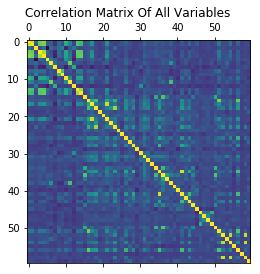


11 HIGHEST total correlations:


,AGASSLT,P1VLNT,ALLOTHR,OTHASLT,Goods-producing Establishment Count,P1TOT,DRGPOSS,LARCENY,VANDLSM,DRUGTOT,"Trade, transportation, and utilities Establishment Count"
0,11.712917,11.545698,11.106103,9.953717,9.885347,9.875457,9.796541,9.663007,9.513484,9.435309,9.363493


In [23]:
corrdb = finaldb.corr().abs().sum()
corrdbl = pd.DataFrame(data=corrdb).nlargest(11,0).transpose()  # Largest correlations
corrdbs = pd.DataFrame(data=corrdb).nsmallest(10,0).transpose()   # Smallest correlations
# Creates a correlation matrix of all variables
plt.matshow(finaldb.corr())
plt.suptitle('Correlation Matrix Of All Variables\n')
plt.show()
cols = finaldb.columns.tolist()
print('\n11 HIGHEST total correlations:')
corrdbl

In [24]:
l = corrdbl.columns.tolist() # variables to regress on
exp = l[1:] # Selects variable with highest total correlation to use as dependant variable
dep = l[0] # Uses next 10 most correlated variables to act as independant variables

# REGRESSION

Regression is of most correlated variable on next 10 most correlated variables

In [25]:
x = finaldb[exp]  # Select columns to use as independant vars
y = finaldb[dep]  # Set y variable

model = sm.OLS(y, x.astype(float)).fit()
predictions = model.predict(x) # make the predictions by the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                AGASSLT   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     173.8
Date:                Wed, 05 Jun 2019   Prob (F-statistic):          9.55e-134
Time:                        17:14:48   Log-Likelihood:                -279.69
No. Observations:                 383   AIC:                             579.4
Df Residuals:                     373   BIC:                             618.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

# Regression of most correlated variable on all economic variables

In [27]:
x = finaldb[finaldb.columns.tolist()[:15]]  # Selects all economic variables
y = finaldb[dep]  # Set y variable

model = sm.OLS(y, x.astype(float)).fit()
predictions = model.predict(x) # make the predictions by the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                AGASSLT   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     9.461
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           7.46e-19
Time:                        17:14:57   Log-Likelihood:                -549.20
No. Observations:                 383   AIC:                             1128.
Df Residuals:                     368   BIC:                             1188.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

# Regression Summary

The first regression likely has the highest R-squared in our sample. Perhaps unsurprisingly we see that crime rates are more related to each other than with or between economic data. We also see that aggregate variables tend to be the strongest which makes sense again due to their interconnected nature.




In the second regression we can see the most correlated crime rate (Aggravated Assault) regressed on all of our economic variables. It is a substantially lower R-squared value, however it is still significant (27%). 

**In summary we see that changes in establishment counts, average weekly wages, and employment numbers for the 5 largest industries explain about 27% of the changes in total crimes.** 